## ETS Decomposition

Statsmodels provides a seasonal decomposition tool we can use to separate out the different components.
This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components
seem to be constant over time (e.g. every year we add 10,000 passengers).

A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate
(e.g. each year we double the amount of passengers). For these examples we'll use the International
Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [1]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Load the dataset

In [2]:
airline = pd.read_csv("D://ML-Datasets//Udemy-TimeSeries//airline_passengers.csv",
                     index_col='Month', parse_dates=True)

airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


The data is monthly

### Data exploration

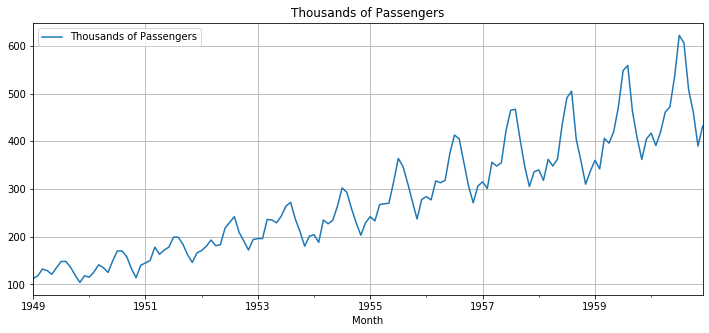

In [3]:
# Plot the passengers data
airline.plot(figsize=(12, 5), title='Thousands of Passengers', grid=True)

From the plot, we see that the trend is increasing but slightly at a higher rate than linear. So we will use
multiplicative model

In [4]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [5]:
# Now we can get the individual component from the result
print("Trend Component \n")
print(result.trend)
print("Seasonality Component \n")
print(result.seasonal)
print("Residual Component \n")
print(result.resid)

Trend Component 

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
Seasonality Component 

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64
Residual Component 

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64


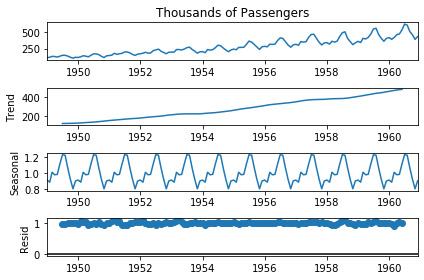

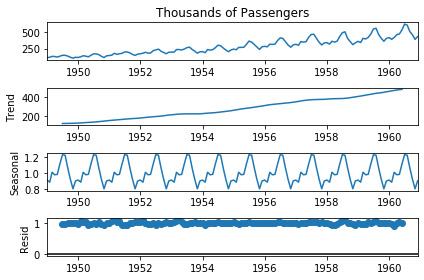

In [6]:
# To observe the various components graphically
result.plot()

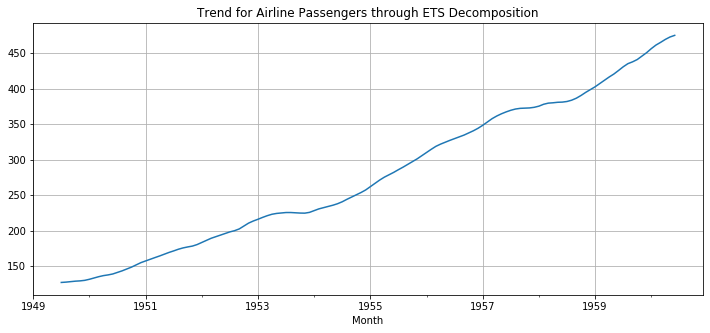

In [7]:
# Since the decomposition components are series, they can be individually plotted as well
result.trend.plot(figsize=(12, 5), title='Trend for Airline Passengers through ETS Decomposition', grid=True)

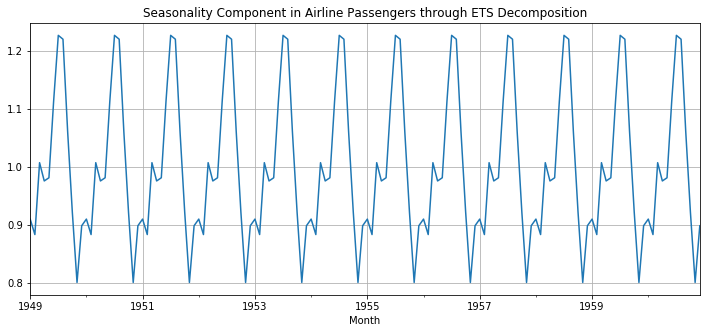

In [8]:
result.seasonal.plot(figsize=(12, 5), title='Seasonality Component in Airline Passengers through ETS Decomposition',
                    grid=True)